You are given an m x n integer matrix grid, where you can move from a cell to any adjacent cell in all 4 directions.

Return the number of strictly increasing paths in the grid such that you can start from any cell and end at any cell. Since the answer may be very large, return it modulo 109 + 7.

Two paths are considered different if they do not have exactly the same sequence of visited cells.

 

Example 1:

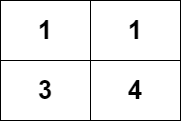

Input: grid = [[1,1],[3,4]]
Output: 8
Explanation: The strictly increasing paths are:
- Paths with length 1: [1], [1], [3], [4].
- Paths with length 2: [1 -> 3], [1 -> 4], [3 -> 4].
- Paths with length 3: [1 -> 3 -> 4].
The total number of paths is 4 + 3 + 1 = 8.

Example 2:

Input: grid = [[1],[2]]
Output: 3
Explanation: The strictly increasing paths are:
- Paths with length 1: [1], [2].
- Paths with length 2: [1 -> 2].
The total number of paths is 2 + 1 = 3.

 

Constraints:

    m == grid.length
    n == grid[i].length
    1 <= m, n <= 1000
    1 <= m * n <= 105
    1 <= grid[i][j] <= 105



In [ ]:
class Solution:
    def countPaths(self, grid: List[List[int]]) -> int:
        paths = [[-1 for _ in grid[0]] for _ in grid]
        m = len(grid) - 1
        n = len(grid[0]) - 1
        MOD = 10**9 + 7

        def dfs(x, y):
            if paths[x][y] != -1:
                return paths[x][y]
            ans = 1
            if x > 0 and grid[x][y] < grid[x - 1][y]:
                ans += dfs(x - 1, y)
            if x < m and grid[x][y] < grid[x + 1][y]:
                ans += dfs(x + 1, y)
            if y > 0 and grid[x][y] < grid[x][y - 1]:
                ans += dfs(x, y - 1)
            if y < n and grid[x][y] < grid[x][y + 1]:
                ans += dfs(x, y + 1)
            ans %= MOD
            paths[x][y] = ans
            return ans

        ans = 0
        for i in range(len(grid)):
            for j in range(len(grid[0])):
                ans += dfs(i, j)

        return ans % MOD

In [ ]:
class Solution:
    def countPaths(self, grid: List[List[int]]) -> int:
        m = len(grid) - 1
        n = len(grid[0]) - 1
        MOD = 10**9 + 7

        @cache
        def dfs(x, y):
            ans = 1
            if x > 0 and grid[x][y] < grid[x - 1][y]:
                ans += dfs(x - 1, y)
            if x < m and grid[x][y] < grid[x + 1][y]:
                ans += dfs(x + 1, y)
            if y > 0 and grid[x][y] < grid[x][y - 1]:
                ans += dfs(x, y - 1)
            if y < n and grid[x][y] < grid[x][y + 1]:
                ans += dfs(x, y + 1)
            ans %= MOD
            return ans

        ans = 0
        for i in range(len(grid)):
            for j in range(len(grid[0])):
                ans += dfs(i, j)

        return ans % MOD